In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model


In [82]:
df_test = pd.read_csv(r"D:\python_jupty\機器學習作業\大里補值完_2022.csv")

In [83]:
df_selected_test = df_test[[ 'PM10', 'PM2.5','aqi']]

In [84]:
import pickle

df_selected_test_head = df_selected_test.head(6)
df_selected_test_head
print(df_selected_test_head)

with open(r"D:\python_jupty\機器學習作業\model用\scaler.pkl", 'rb') as f:
    scaler = pickle.load(f)
with open(r"D:\python_jupty\機器學習作業\model用\scaler2.pkl", 'rb') as f:
    scaler2 = pickle.load(f)

time_steps = 6
test = df_selected_test_head
test_temp = test.to_numpy()


test_np= scaler.transform(test_temp)


x_test = []
y_test = []
x_test.append(test_np[0:time_steps])
y_test= df_selected_test['aqi']#所有的aqi
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test)

   PM10  PM2.5  aqi
0    41     27   54
1    45     31   60
2    41     28   67
3    42     31   71
4    47     35   75
5    41     32   79
[[[0.13898305 0.36486486 0.28571429]
  [0.15254237 0.41891892 0.32298137]
  [0.13898305 0.37837838 0.36645963]
  [0.14237288 0.41891892 0.39130435]
  [0.15932203 0.47297297 0.41614907]
  [0.13898305 0.43243243 0.44099379]]]


In [85]:
loaded_LSTM_RANDOMFOREST = load_model(r"D:\python_jupty\機器學習作業\model用\LSTM_RANDOMFOREST_6_3_rmse59.keras")

In [86]:
j = 0 
num_steps_to_show = 3
initial_sequence = []
initial_sequence.append(x_test[0][0:time_steps])
initial_sequence = np.array(initial_sequence)

initial_sequence = np.array(initial_sequence)
sequence = []
temp = x_test.shape[2]
for i in range(num_steps_to_show):
    new_prediction = loaded_LSTM_RANDOMFOREST.predict(initial_sequence)
  
    initial_sequence = initial_sequence[0][1:]
    
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0).reshape(-1,time_steps,x_test.shape[2])
    
    sequence.append(new_prediction[0][temp-1])

sequence = scaler2.inverse_transform(np.array(sequence).reshape(3,1))
sequence=sequence.astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


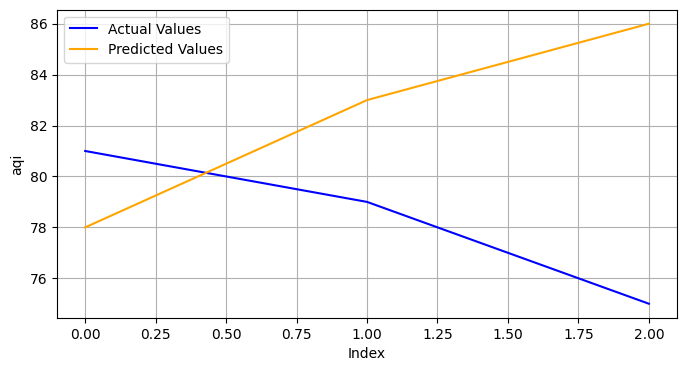

In [87]:

plt.figure(figsize=(8, 4))
plt.plot(y_test[j+time_steps:j+time_steps+num_steps_to_show], label='Actual Values', color='blue', linestyle='-')
plt.plot(sequence[:num_steps_to_show], label='Predicted Values', color='orange', linestyle='-')
plt.xlabel('Index')
plt.ylabel('aqi')
plt.legend()
plt.grid(True)
plt.show()